# Electric Vehicle in Washington State

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pickle
# import missingno as msno

In [2]:
from IPython.display import display, HTML

def print_all(df): 
    with pd.option_context('display.max_rows',None):
        with pd.option_context('display.max_columns',None):
            with pd.option_context('display.float_format', '{:,.4f}'.format):
                with pd.option_context('display.float_format', '{:,.4f}'.format): # 셀 안의 내용 전체 출력
                    print(df.shape)
                    display(df)

def print_cols(df, n=5): 
    with pd.option_context('display.max_columns',None):
        with pd.option_context('display.float_format', '{:,.4f}'.format):
            print(df.shape)
            display(df[:n])

---
# Electric Vehicle Population by State in US

Source: Alternative Fuels Data Center
- https://afdc.energy.gov/data/10962

In [169]:
# Electric Vehicle Registration Counts by State

ev_state = pd.read_excel('data/10962-ev-registration-counts-by-state_9-06-24.xlsx', sheet_name='EV Registration Counts in 2023', index_col=0, header=[2], nrows=51)

ev_state.columns = ['_'.join(col.strip().lower().split()) for col in ev_state.columns]
ev_state = ev_state.sort_values('registration_count', ascending=False).reset_index(drop=True)

ev_state

,state,registration_count
0,California,1256646
1,Florida,254878
2,Texas,230125
3,Washington,152101
4,New Jersey,134753
5,New York,131250
6,Illinois,99573
7,Georgia,92368
8,Colorado,90083
9,Arizona,89798


In [171]:
# for color code
ev_state['color'] = np.where(ev_state['state'] == 'Washington', 'light blue', 'lightgray')
ev_state

,state,registration_count,color
0,California,1256646,lightgray
1,Florida,254878,lightgray
2,Texas,230125,lightgray
3,Washington,152101,light blue
4,New Jersey,134753,lightgray
5,New York,131250,lightgray
6,Illinois,99573,lightgray
7,Georgia,92368,lightgray
8,Colorado,90083,lightgray
9,Arizona,89798,lightgray


In [170]:
import pickle

with open('data/ev_state.pickle', 'wb') as f:
    pickle.dump(ev_state, f)

# with open('data/ev_state.pickle', 'rb') as f:
#     ev_state = pickle.load(f)

## Visualizations

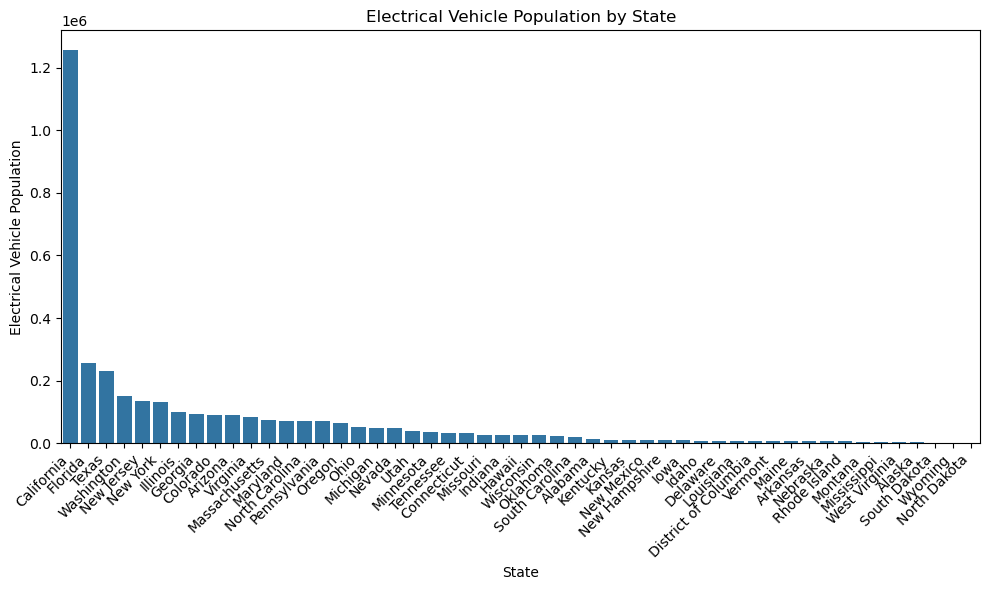

In [167]:
# Electrical Vehicle Population by State

plt.figure(figsize=(10,6))

sns.barplot(data=ev_state, x='state', y='registration_count')

plt.title('Electrical Vehicle Population by State')
plt.xlabel('State')
plt.ylabel('Electrical Vehicle Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

---
# Electric Vehicle Population Status

Source: https://data.wa.gov/Transportation/Electric-Vehicle-Population-Data/f6w7-q2d2/about_data

Types of Electric Vehicle (EV) in the dataset:
1) Battery Electric Vehicle (BEV)
- "A Battery Electric Vehicle (BEV) is an all-electric vehicle using one or more batteries to store the electrical energy that powers the motor and is charged by plugging the vehicle in to an electric power source."
which is a general Electric (EV)

2) Plug-in Hybrid Electric Vehicle (PHEV)
- "A Plug-in Hybrid Electric Vehicle (PHEV) is a vehicle that uses one or more batteries to power an electric motor; uses another fuel, such as gasoline or diesel, to power an internal combustion engine or other propulsion source; and is charged by plugging the vehicle in to an electric power source."

In [8]:
# Electric Vehicle Population Data

ev = pd.read_csv('./data/Electric_Vehicle_Population_Data_20241003.csv'
                 , dtype={'Postal Code':'object'
                          , 'Legislative District':'object'
                          , 'DOL Vehicle ID':'object'
                          , '2020 Census Tract':'object'})
# lower case
ev.columns = ['_'.join(col.strip().lower().split()) for col in ev.columns]
# change column names
ev.rename(columns={'vin_(1-10)':'vin'
                    , 'electric_vehicle_type':'ev_type'
                    , 'clean_alternative_fuel_vehicle_(cafv)_eligibility':'cafv_eligibility'}
           , inplace=True)

# df = ev.copy() # copy
print_cols(ev, 2)

(205439, 17)


,vin,county,city,state,postal_code,model_year,make,model,ev_type,cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0000,0.0000,35,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,53035091301
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0000,0.0000,35,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,53035080700


## Data Cleaning

In [9]:
## Handling missing values

# county, city, postal code, electric_utility, 2020_census_tract -> remove null
ev = ev.dropna(subset=['county', 'city', 'postal_code', 'electric_utility', '2020_census_tract'], how='all')

# model -> impute
ev.loc[ev['make'] == 'GMC', 'model'] = ev.loc[ev['make'] == 'GMC', 'model'].fillna('HUMMER EV PICKUP')

# electric_range, base_msrp -> impute
cond = (ev['model_year'] == 2024) & (ev['make'] == 'MERCEDES-BENZ') & (ev['model'] == 'S-CLASS')
ev.loc[cond, 'electric_range'] = ev.loc[cond, 'electric_range'].fillna(46)
ev.loc[cond, 'base_msrp'] = ev.loc[cond, 'base_msrp'].fillna(0)

# vehicle_location
# -> later, if necessary

# legislative_district -> drop null
ev = ev.dropna(subset=['legislative_district'])

# ======================================= #
## Handling outliers

# Numeric columns
# numeric_columns = ['model_year', 'electric_range', 'base_msrp']

# IQR based outlier check
# for col in numeric_columns:
#     Q1 = ev[col].quantile(0.25)
#     Q3 = ev[col].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     print(f"\nOutliers in {col}:")
#     print(ev[(ev[col] < lower_bound) | (ev[col] > upper_bound)][col].describe())
    
#     # replace with lower bound and upper bound
#     ev[col] = ev[col].clip(lower_bound, upper_bound)

# Categorical columns
# categorical_columns = ['county', 'city', 'make', 'model', 'ev_type', 'cafv_eligibility', 'electric_utility']
categorical_columns = ['make', 'ev_type', 'cafv_eligibility', 'electric_utility']

for col in categorical_columns:
    value_counts = ev[col].value_counts()
    rare_categories = value_counts[value_counts < len(ev) * 0.01].index  # 1% 미만의 빈도를 가진 범주
    print(f"\nRare categories in {col}:")
    print(rare_categories)
    
    # replace with 'Other'
    ev[col] = ev[col].replace(rare_categories, 'Other')

# after preprocessing
print("\nData shape after preprocessing:", ev.shape)
print("\nNull values after preprocessing:")
print(ev.isnull().sum())


Rare categories in make:
Index(['MERCEDES-BENZ', 'SUBARU', 'PORSCHE', 'POLESTAR', 'HONDA', 'MITSUBISHI',
       'MINI', 'FIAT', 'LEXUS', 'CADILLAC', 'MAZDA', 'DODGE', 'LINCOLN',
       'LUCID', 'GENESIS', 'SMART', 'JAGUAR', 'FISKER', 'ALFA ROMEO',
       'LAND ROVER', 'GMC', 'ACURA', 'TH!NK', 'BENTLEY', 'AZURE DYNAMICS',
       'WHEEGO ELECTRIC CARS', 'ROLLS-ROYCE', 'RAM'],
      dtype='object', name='make')

Rare categories in ev_type:
Index([], dtype='object', name='ev_type')

Rare categories in cafv_eligibility:
Index([], dtype='object', name='cafv_eligibility')

Rare categories in electric_utility:
Index(['BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOHOMISH COUNTY',
       'PACIFICORP',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF BENTON COUNTY',
       'MODERN ELECTRIC WATER COMPANY', 'PUD NO 1 OF CHELAN COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUGET SOUND ENERGY INC||PUD NO 1 OF JEFFERSON COUNTY',
       'BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF COWLITZ COUN

In [36]:
print_cols(ev, 2)

(204997, 17)


,vin,county,city,state,postal_code,model_year,make,model,ev_type,cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0000,0.0000,35,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,53035091301
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0000,0.0000,35,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,53035080700


In [135]:
# import pickle

# with open('data/ev.pickle', 'wb') as f:
#     pickle.dump(ev, f)

# with open('data/ev.pickle', 'rb') as f:
#     ev = pickle.load(f)

## Visualizations

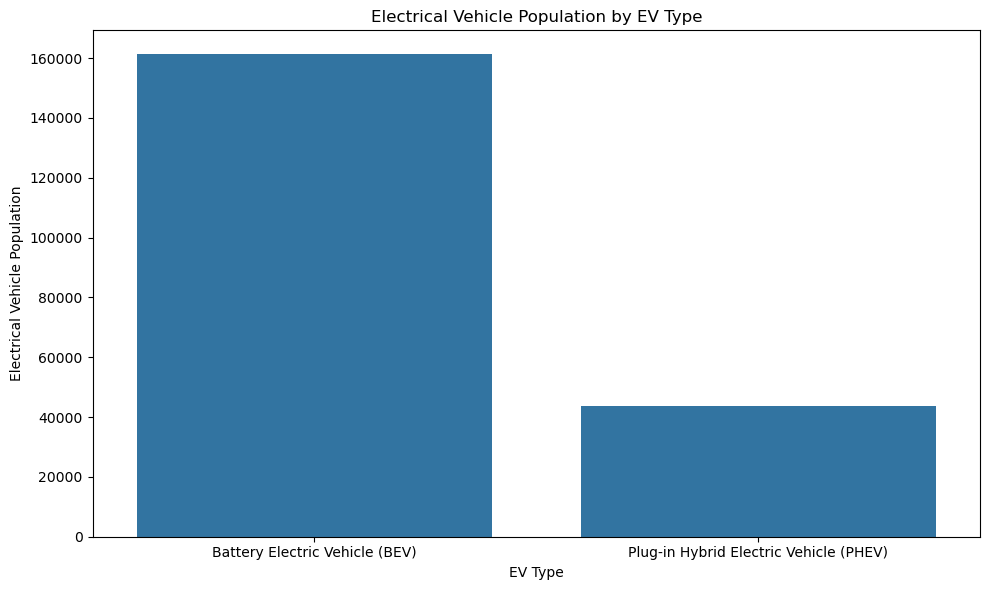

In [59]:
# Electrical Vehicle Population by EV Type

plt.figure(figsize=(10,6))

sns.countplot(data=ev, x='ev_type'
             , order=ev['ev_type'].value_counts().index)

plt.title('Electrical Vehicle Population by EV Type')
plt.xlabel('EV Type')
plt.ylabel('Electrical Vehicle Population')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

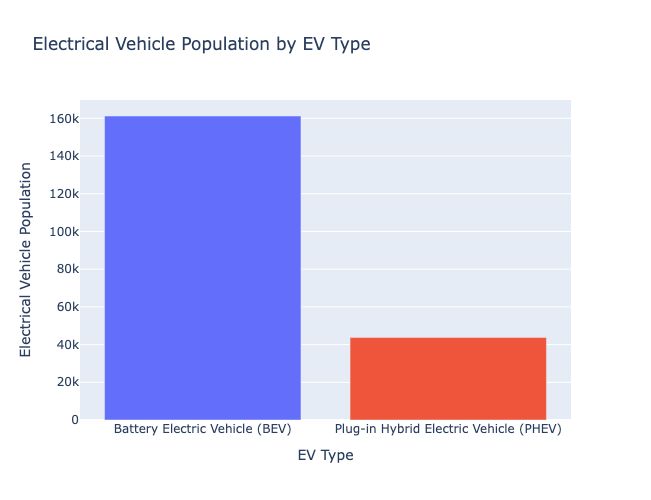

In [140]:
# Try Plotly
import plotly.express as px

# EV 타입별 카운트 계산
ev_type_counts = ev['ev_type'].value_counts().reset_index()
ev_type_counts.columns = ['ev_type', 'count']

# Plotly를 사용한 바 차트 생성
fig = px.bar(ev_type_counts, x='ev_type', y='count',
             title='Electrical Vehicle Population by EV Type',
             labels={'count': 'Electrical Vehicle Population', 'ev_type': 'EV Type'},
             color='ev_type')

# 레이아웃 조정
fig.update_layout(
    xaxis_title='EV Type',
    yaxis_title='Electrical Vehicle Population',
    showlegend=False,
    width=800,
    height=500
)

# 차트 표시
fig.show()

In [172]:
# Get Plotly's default color sequence
print(px.colors.qualitative.Plotly)

['#636EFA', '#EF553B', '#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52']


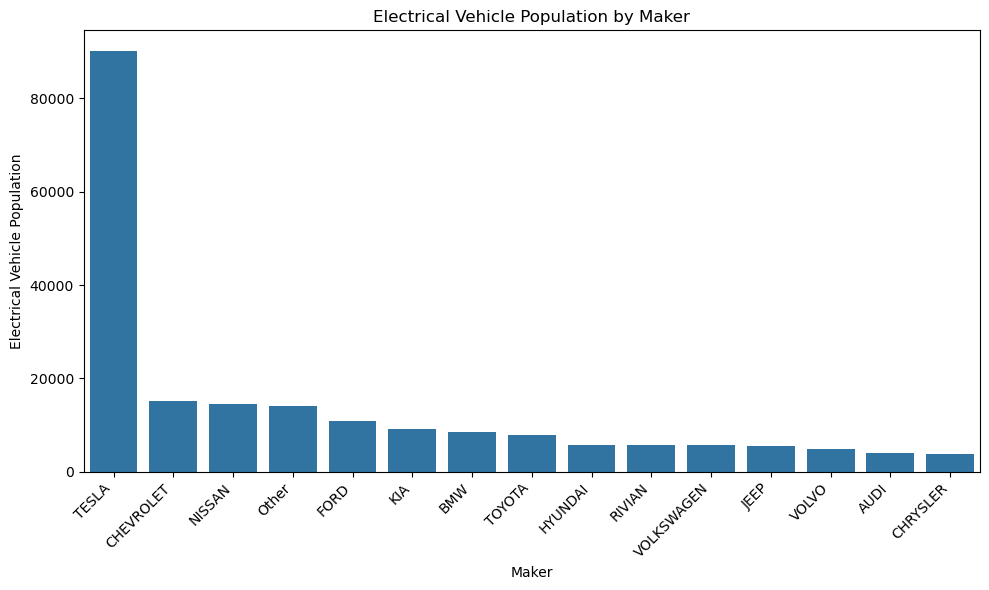

In [60]:
# Electrical Vehicle Population by Maker

plt.figure(figsize=(10,6))

sns.countplot(data=ev, x='make'
             , order=ev['make'].value_counts().index)

plt.title('Electrical Vehicle Population by Maker')
plt.xlabel('Maker')
plt.ylabel('Electrical Vehicle Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

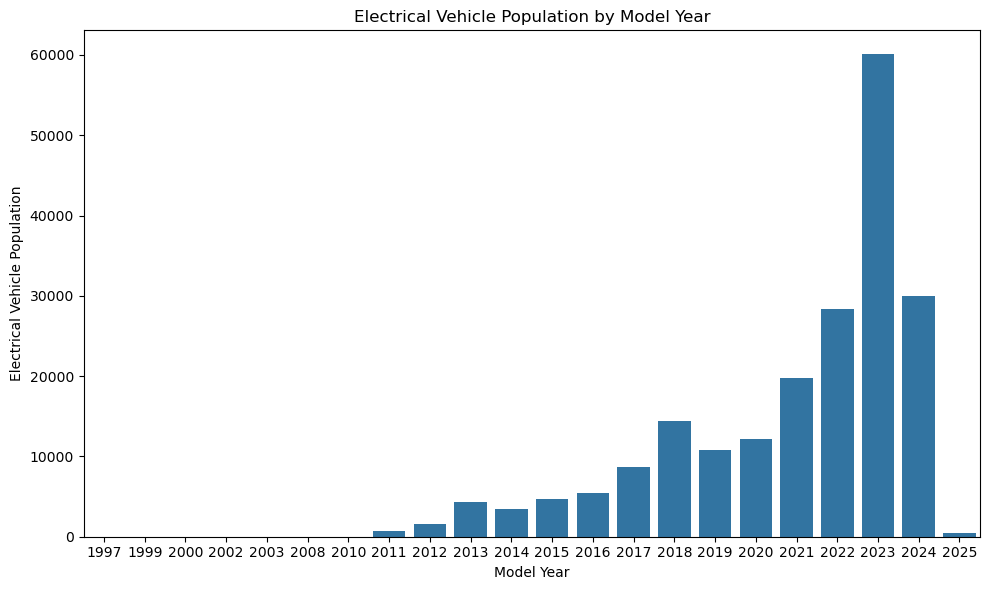

In [61]:
# Electrical Vehicle Population by Model Year

plt.figure(figsize=(10,6))

sns.countplot(data=ev, x='model_year')

plt.title('Electrical Vehicle Population by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electrical Vehicle Population')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

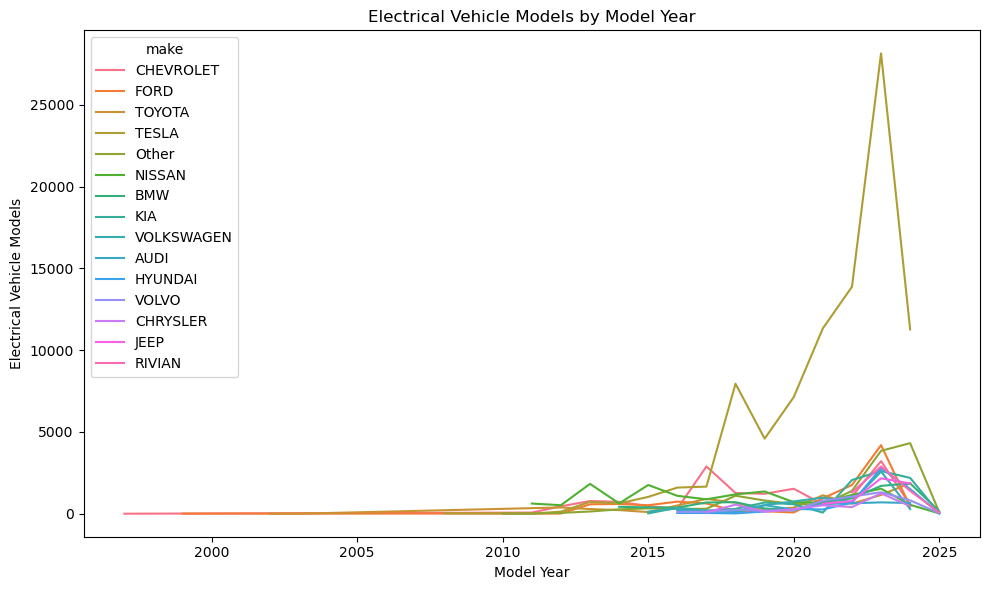

In [228]:
# Electrical Vehicle Models by Model Year

plt.figure(figsize=(10,6))

model_counts = ev.groupby(['model_year', 'make']).size().reset_index(name='count')
sns.lineplot(data=model_counts, x='model_year', y='count', hue='make')

plt.title('Electrical Vehicle Models by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electrical Vehicle Models')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

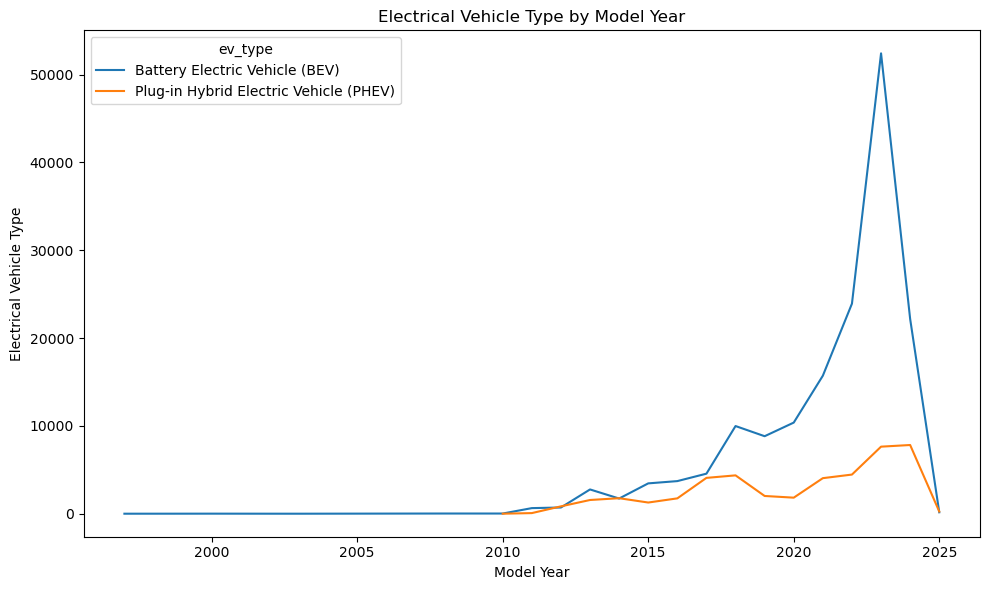

In [229]:
# Electrical Vehicle Type by Model Year

plt.figure(figsize=(10,6))

model_counts = ev.groupby(['model_year', 'ev_type']).size().reset_index(name='count')
sns.lineplot(data=model_counts, x='model_year', y='count', hue='ev_type')

plt.title('Electrical Vehicle Type by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Electrical Vehicle Type')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

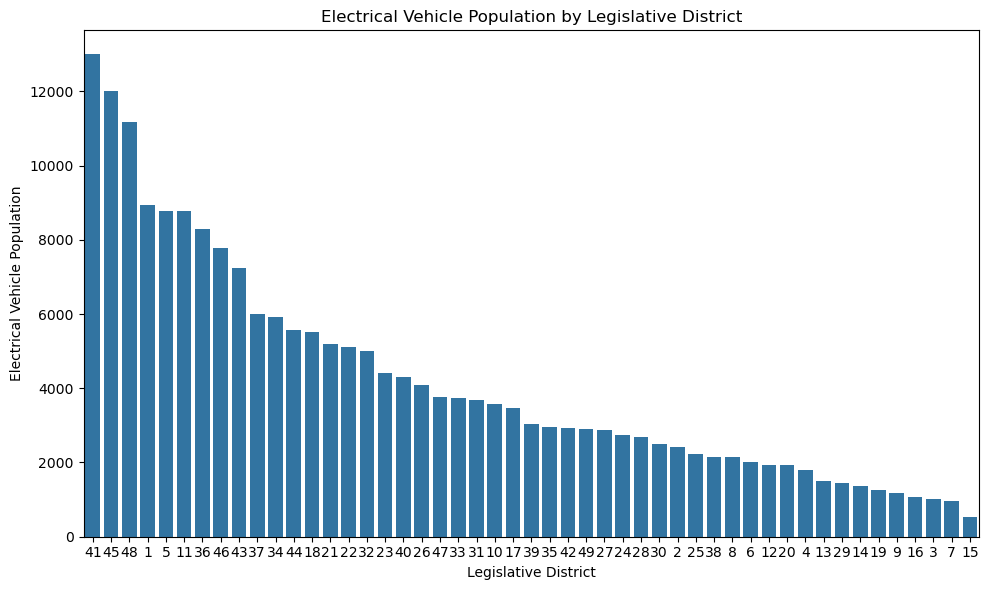

In [110]:
# Electrical Vehicle Population by Legislative District

order_ld = ev['legislative_district'].value_counts().index

plt.figure(figsize=(10,6))
sns.countplot(data=ev, x='legislative_district'
             , order=order_ld)
plt.title('Electrical Vehicle Population by Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Electrical Vehicle Population')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

---
# 2022 General Election Results in Washington State

Source: https://www.kaggle.com/datasets/josephdemey/2022-washington-state-legislative-election-results

- United States state legislative elections (US Senator election) occurred in 2022 in the Washington state

In [119]:
# 2022 election results by legislative district
election_ld = pd.read_excel('data/2022gen results by legislative district.xlsx', sheet_name='FINAL by LD', header=[1], nrows=49)

# filter columns
include_cols = ['District Name','Registered Voters','Ballots Cast','% Turnout','Patty Murray','Tiffany Smiley']
election_ld = election_ld[include_cols]

# lower columns
election_ld.columns = ['_'.join(col.strip().lower().split()) for col in election_ld.columns]

# rename columns
election_ld.rename(columns={'district_name':'legislative_district'}, inplace=True)

election_ld.head(1)

,legislative_district,registered_voters,ballots_cast,%_turnout,patty_murray,tiffany_smiley
0,Legislative District 1,99789,69622,0.697692,48493,20631


## Feature Engineering

In [120]:
# keep only number value in district column for merge with main table
election_ld['legislative_district'] = election_ld['legislative_district'].apply(lambda x: x.split()[-1])

# create a column of election winner party
def find_winner(df):
    if df['patty_murray'] > df['tiffany_smiley']:
        return 'Democratic'
    else:
        return 'Republican'

election_ld['party_won'] = election_ld.apply(find_winner, axis=1)
election_ld.head(1)

,legislative_district,registered_voters,ballots_cast,%_turnout,patty_murray,tiffany_smiley,party_won
0,1,99789,69622,0.697692,48493,20631,Democratic


## Merge

In [64]:
# Merge 1:
# raw data merge

# merge into the elctric vehicle registration table
ev_elec = pd.merge(left=ev, right=election_ld, how='inner', on='legislative_district')

print_cols(ev_elec, 2)

(204997, 23)


,vin,county,city,state,postal_code,model_year,make,model,ev_type,cafv_eligibility,electric_range,base_msrp,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,registered_voters,ballots_cast,%_turnout,patty_murray,tiffany_smiley,party_won
0,JTMAB3FV3P,Kitsap,Seabeck,WA,98380,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0000,0.0000,35,240684006,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,53035091301,111227,75878,0.6822,35917,39273,Republican
1,1N4AZ1CP6J,Kitsap,Bremerton,WA,98312,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151.0000,0.0000,35,474183811,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,53035080700,111227,75878,0.6822,35917,39273,Republican


In [65]:
# Merge 2:
# groupby legislative_district and merge

# main ev data
# save the number of electrical vehicles by each district
ev_district = ev['legislative_district'].value_counts().rename('ev_count')

# election data
# add ev count as a new column to the election result table
ev_merged = pd.merge(left=ev_district, right=election_ld, how='inner', on='legislative_district') # inner join

print_cols(ev_merged, 2)

(49, 8)


,legislative_district,ev_count,registered_voters,ballots_cast,%_turnout,patty_murray,tiffany_smiley,party_won
0,41,12994,98278,65840,0.6699,45730,19526,Democratic
1,45,12003,96577,67381,0.6977,46385,20531,Democratic


## Visualizations

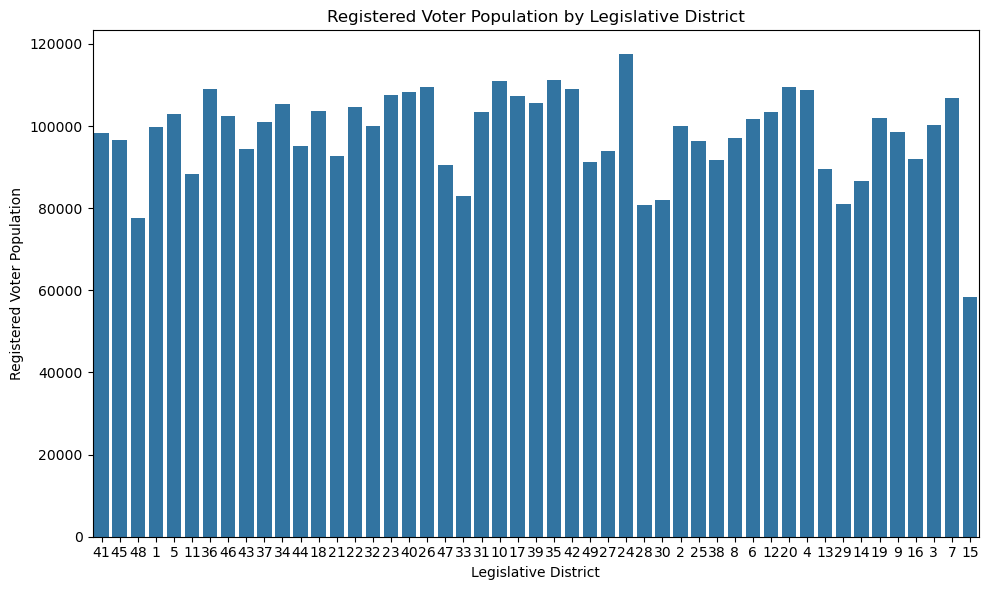

In [67]:
# Registered Voter Population by Legislative District

plt.figure(figsize=(10,6))

# temp = ev_elec.groupby('legislative_district')['registered_voters'].mean()
# sns.barplot(data=temp, order=order_ld)
sns.barplot(data=ev_merged, x='legislative_district', y='registered_voters', order=order_ld)

plt.title('Registered Voter Population by Legislative District')
plt.xlabel('Legislative District')
plt.ylabel('Registered Voter Population')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

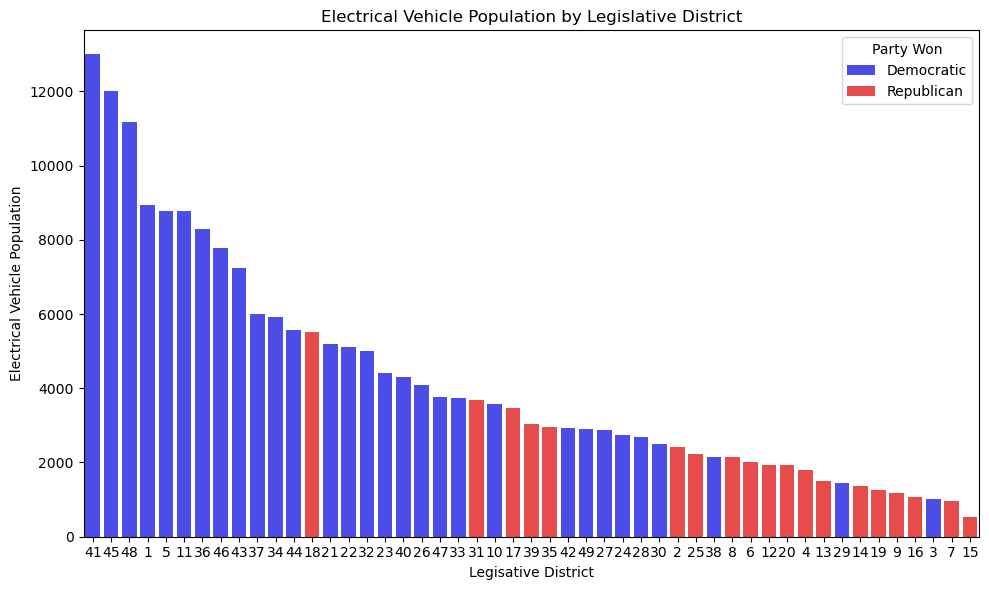

In [69]:
# plot for ev population per district
# political party color coded

us_political_party_colors = {
    'Democratic': {'hex':'#3333FF', 'rgb':(51, 51, 255)}, # light blue
    'Republican': {'hex':'#FF3333', 'rgb':(255, 51, 51)} # light red
}
democratic_color = us_political_party_colors['Democratic']['hex']
republican_color = us_political_party_colors['Republican']['hex']
party_colors = {'Democratic':democratic_color, 'Republican':republican_color}

plt.figure(figsize=(10,6))
# sns.countplot(data=ev_elec, x='legislative_district'
#               , order=order_ld, hue='party_won', palette=party_colors)
sns.barplot(data=ev_merged, x='legislative_district', y='ev_count'
              , order=order_ld, hue='party_won', palette=party_colors)
plt.title('Electrical Vehicle Population by Legislative District')
plt.xlabel('Legisative District')
plt.ylabel('Electrical Vehicle Population')
plt.legend(title='Party Won')
plt.tight_layout()
plt.show();

In [ ]:
# party_colors = {'Democratic': '#3333FF', 'Republican': '#FF3333'}
# party_colors = {'Democratic': '#0068C9', 'Republican': '#FF4B4B'} # 밝고 선명한 붉은색
# party_colors = {'Democratic': '#0068C9', 'Republican': '#E63946'} # 약간 더 어두운 붉은색; 전문적인 느낌; 살짝 광 있느 느낌
# party_colors = {'Democratic': '#0068C9', 'Republican': '#DC3545'} # Bootstrap의 'danger' 색상; 살짝 광 있는 느낌; 바로 위 것보단 조금 더 어두움

# Alternative Fuel Stations in Washington State

- Electric charging station information such as location
- https://afdc.energy.gov/data_download

In [604]:
# read alternative fuel stations in washington dataset
# source: https://afdc.energy.gov/data_download

charger = pd.read_csv('data/alt_fuel_stations (Oct 7 2024).csv')
charger.columns = ['_'.join(col.strip().lower().split()) for col in charger.columns]

# drop all-null cols
charger = charger.dropna(axis=1, how='all')

print_cols(charger, 3)

,fuel_type_code,station_name,street_address,intersection_directions,city,state,zip,plus4,station_phone,status_code,...,rd_blends,rd_blends_(french),rd_blended_with_biodiesel,rd_maximum_biodiesel_level,nps_unit_name,cng_station_sells_renewable_natural_gas,lng_station_sells_renewable_natural_gas,maximum_vehicle_class,ev_workplace_charging,funding_sources
0,ELEC,City of Lacey - City Hall Parking,420 College St,"At 3rd Ave SE, next to police station",Lacey,WA,98503,NaN,360-491-3214,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LD,False,NaN


## Feature Engineering

In [653]:
# geocode legislative district using latitude/longitude coordinate
# reference: https://geocoding.geo.census.gov/geocoder/Geocoding_Services_API.pdf
# source: 
# lon = -122.822404
# lat = 47.044011
# https://geocoding.geo.census.gov/geocoder/geographies/coordinates?x=-122.822404&y=47.044011&benchmark=4&vintage=4

import re
import time
import requests
from tqdm import tqdm
from joblib import Parallel, delayed

# extract legislative district numbers using latitude/longitude coordinate
def get_legislative_district(lon, lat):
    api_url = "https://geocoding.geo.census.gov/geocoder/geographies/coordinates"
    params = {
        "benchmark": "Public_AR_Current",
        "vintage": "Current_Current",
        "x": lon, # longitude
        "y": lat, # latitude 
        "format": "json"
    }
    response = requests.get(api_url, params=params)
    data = response.json()
    try:
        upper_district = data["result"]["geographies"]['2024 State Legislative Districts - Upper'][0]["NAME"]
        lower_district = data["result"]["geographies"]['2024 State Legislative Districts - Lower'][0]["NAME"]

        upper_district = re.findall(r'\d+', upper_district)
        lower_district = re.findall(r'\d+', lower_district)

        # if district number exists, extract it; if not, None
        upper_district = upper_district[0] if upper_district else None
        lower_district = lower_district[0] if lower_district else None
        
        return upper_district, lower_district
    except Exception as e:
        print(f"Error: {e}")
        return None

# parallel process
def parallel_process(charger, n_jobs=-1):
    coordinates = ['longitude','latitude']
    results = Parallel(backend='loky', n_jobs=n_jobs)(delayed(get_legislative_district)(row[0], row[1]) for row in tqdm(charger[coordinates].itertuples(index=False), total=len(charger), leave=True, position=0))
    return results

districts_list = parallel_process(charger)
charger[['legislative_district_upper','legislative_district_lower']] = districts_list
print_cols(charger, 2)

100%|███████████████████████████████████████| 2705/2705 [01:56<00:00, 23.29it/s]


(2705, 43)


,fuel_type_code,station_name,street_address,intersection_directions,city,state,zip,station_phone,status_code,expected_date,groups_with_access_code,access_days_time,cards_accepted,ev_level1_evse_num,ev_level2_evse_num,ev_dc_fast_count,ev_network,ev_network_web,geocode_status,latitude,longitude,date_last_confirmed,id,updated_at,owner_type_code,federal_agency_id,federal_agency_name,open_date,ev_connector_types,country,groups_with_access_code_(french),access_code,access_detail_code,federal_agency_code,facility_type,ev_pricing,ev_on-site_renewable_source,restricted_access,nps_unit_name,maximum_vehicle_class,ev_workplace_charging,legislative_district_upper,legislative_district_lower
0,ELEC,City of Lacey - City Hall Parking,420 College St,"At 3rd Ave SE, next to police station",Lacey,WA,98503,360-491-3214,E,NaN,Public,24 hours daily,NaN,NaN,4.0000,NaN,Non-Networked,NaN,200-9,47.0440,-122.8224,2023-01-10,33351,2023-02-14 15:54:11 UTC,LG,NaN,NaN,2018-01-15,J1772,US,Public,public,NaN,NaN,MUNI_GOV,Free; 3 hour maximum charging session,NaN,False,NaN,LD,False,22,22
1,ELEC,Seattle-Tacoma International Airport - General...,17801 Pacific Hwy S,"5th floor parking garage; rows D, G, and I",Seattle,WA,98188,206-787-5388,E,NaN,Public,24 hours daily; pay lot; Drivers must bring th...,NaN,NaN,68.0000,NaN,Non-Networked,NaN,200-8,47.4434,-122.2962,2023-12-13,33717,2024-01-31 22:07:01 UTC,P,NaN,NaN,2010-03-01,J1772,US,Public,public,NaN,NaN,AIRPORT,Free,NaN,False,NaN,LD,False,33,33


In [18]:
import pickle

# with open('data/charger.pickle', 'wb') as f:
#     pickle.dump(charger, f)

with open('data/charger.pickle', 'rb') as f:
    charger = pickle.load(f)

## Merge

In [87]:
# Merge 2:
# groupby legislative_district and merge

# electric charger data
# the number of electrical chargers by each district
charger_ld = charger['legislative_district_upper'].value_counts()
charger_ld = charger_ld.rename_axis('legislative_district').rename(index='charger_count')

# add to the merged data
ev_merged = pd.merge(left=ev_merged, right=charger_ld, how='inner', on='legislative_district') # inner join

print_cols(ev_merged, 2)

(49, 9)


,legislative_district,ev_count,registered_voters,ballots_cast,%_turnout,patty_murray,tiffany_smiley,party_won,charger_count
0,41,12994,98278,65840,0.6699,45730,19526,Democratic,53
1,45,12003,96577,67381,0.6977,46385,20531,Democratic,29


## Visualizations

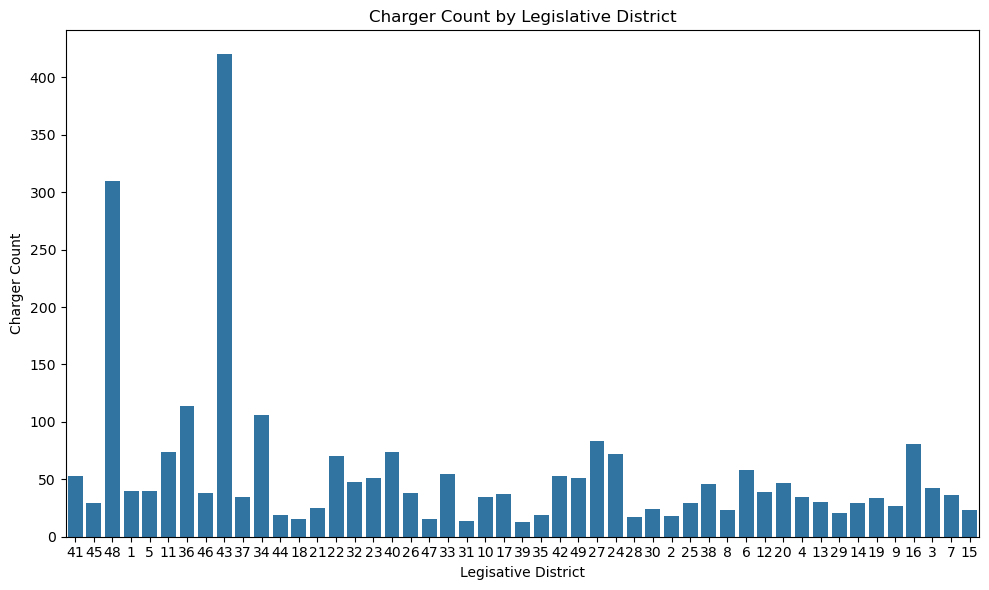

In [108]:
# Charger Count by Legislative District

plt.figure(figsize=(10,6))

# sns.countplot(data=charger, x='legislative_district_upper', order=order_ld)
sns.barplot(data=ev_merged, x='legislative_district', y='charger_count', order=order_ld)

plt.title('Charger Count by Legislative District')
plt.xlabel('Legisative District')
plt.ylabel('Charger Count')
plt.tight_layout()
plt.show();

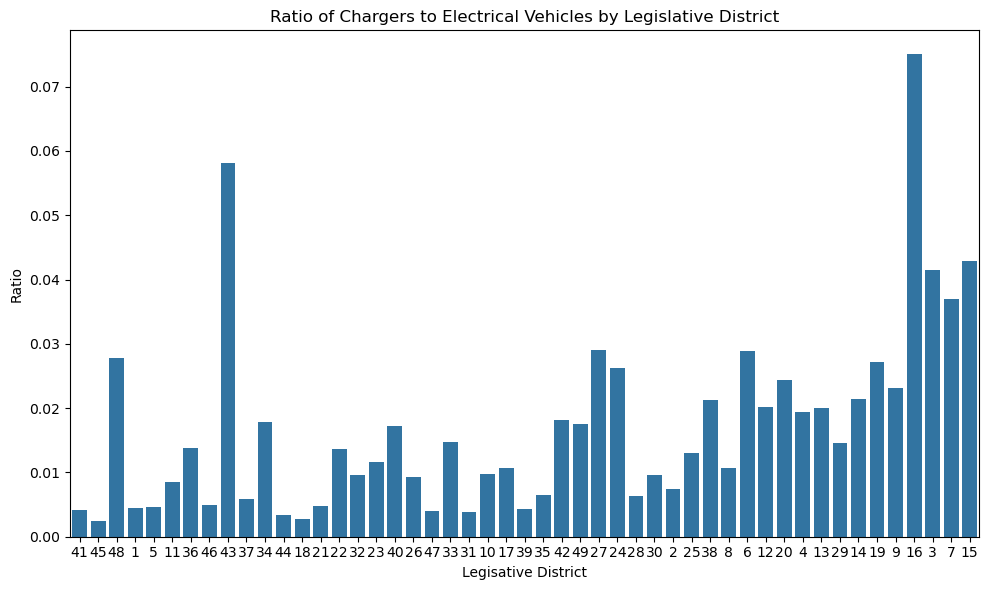

In [111]:
# Ratio of Chargers to Electrical Vehicles by Legislative District

# ev_count = ev_elec['legislative_district'].value_counts()
# charger_count = charger['legislative_district_upper'].value_counts()
# ratio = charger_count / ev_count

plt.figure(figsize=(10,6))

# sns.barplot(x=ratio.index, y=ratio.values, order=order_ld)
ev_merged['charger_ev_ratio'] = ev_merged['charger_count'] / ev_merged['ev_count']
sns.barplot(ev_merged, x='legislative_district', y='charger_ev_ratio', order=order_ld)

plt.title('Ratio of Chargers to Electrical Vehicles by Legislative District')
plt.xlabel('Legisative District')
plt.ylabel('Ratio')
plt.tight_layout()
plt.show();

# Washington Median Household Income in the Past 12 Months (In 2022 Inflation-adjusted Dollars)

Source: https://censusreporter.org/data/table/?table=B19013&geo_ids=610|04000US53#

- ACS 2022 5-year
- The American Community Survey (ACS) 2022 5-year estimates are a set of data collected between January 1, 2018 and December 31, 2022, that represent the characteristics of the population over that period. The ACS is a US Census Bureau initiative that collects demographic information on a nationwide basis. The 5-year estimates are the most reliable and comprehensive of the ACS period estimates, but are also the least current.

In [124]:
# Washington Median Household Income in the Past 12 Months (ACS 2022 5-year)

house_income = pd.read_csv('./data/acs2022_5yr_B19013_61000US53043.csv')

# lower case
house_income.columns = ['_'.join(col.strip().lower().split()) for col in house_income.columns]
# change column names
house_income.rename(columns={'b19013001':'median_household_income'
                             , 'b19013001,_error':'margin_error'
                             , 'name':'legislative_district'
                            }
                    , inplace=True)

house_income['legislative_district'] = house_income['legislative_district'].apply(lambda x: x.strip().split()[-2][:-1])

# df = ev.copy() # copy
print_cols(house_income, 2)

(49, 4)


,geoid,legislative_district,median_household_income,margin_error
0,61000US53001,1,137250,4154
1,61000US53002,2,100417,2575


## Merge

In [127]:
# Merge 2:
# groupby legislative_district and merge

# median household income data
# add to the merged table
ev_merged = pd.merge(left=ev_merged, right=house_income, how='inner', on='legislative_district') # inner join

print_cols(ev_merged, 2)

(49, 13)


,legislative_district,ev_count,registered_voters,ballots_cast,%_turnout,patty_murray,tiffany_smiley,party_won,charger_count,charger_ev_ratio,geoid,median_household_income,margin_error
0,41,12994,98278,65840,0.6699,45730,19526,Democratic,53,0.0041,61000US53041,176908,4036
1,45,12003,96577,67381,0.6977,46385,20531,Democratic,29,0.0024,61000US53045,162491,5810


In [137]:
ev_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   legislative_district     49 non-null     object 
 1   ev_count                 49 non-null     int64  
 2   registered_voters        49 non-null     int64  
 3   ballots_cast             49 non-null     int64  
 4   %_turnout                49 non-null     float64
 5   patty_murray             49 non-null     int64  
 6   tiffany_smiley           49 non-null     int64  
 7   party_won                49 non-null     object 
 8   charger_count            49 non-null     int64  
 9   charger_ev_ratio         49 non-null     float64
 10  geoid                    49 non-null     object 
 11  median_household_income  49 non-null     int64  
 12  margin_error             49 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 5.1+ KB


## Visualizations

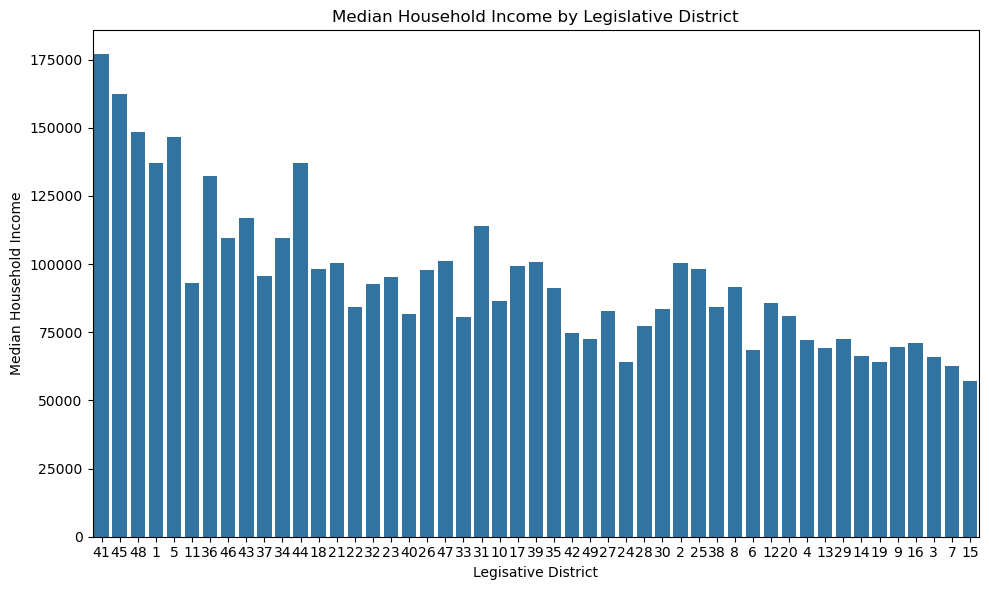

In [128]:
# Median Household Income by Legislative District

plt.figure(figsize=(10,6))

sns.barplot(data=ev_merged, x='legislative_district', y='median_household_income', order=order_ld)

plt.title('Median Household Income by Legislative District')
plt.xlabel('Legisative District')
plt.ylabel('Median Household Income')
plt.tight_layout()
plt.show();

# Washington State Legislative Districts 2022

Source: Washington Geospatial Open Data Portal
- https://geo.wa.gov/datasets/c2b31e7e2b6f464a92d1bed7ab1d7539_0/explore?location=47.056733%2C-120.812244%2C7.15

Description:
- Washington Legislative Districts 2022, as amended by adoption of HCR 4407 on February 8th 2022. Made into law IAW RCW 44.05.
- Contains 49 features representing each of Washington States 49 Legislative Districts.
- Projected to NAD 1983 HARN Washington State Plane South US Feet

In [195]:
# Washington Median Household Income in the Past 12 Months (ACS 2022 5-year)

wa_ld = pd.read_csv('./data/Washington_State_Legislative_Districts_2022.csv'
                    , dtype={'DISTRICTN':'object'})
# filter columns
wa_ld = wa_ld.iloc[:, 3:]
# lower case
wa_ld.columns = ['_'.join(col.strip().lower().split()) for col in wa_ld.columns]

# change column names
wa_ld.rename(columns={'districtn':'legislative_district'}, inplace=True)

# df = ev.copy() # copy
print_cols(wa_ld, 2)

(49, 6)


,legislative_district,shape_leng,shape_le_1,shape_area,shape__area,shape__length
0,1,0.9726,"288,803.8621","1,508,508,716.2500","309,992,363.9766","130,939.0400"
1,2,4.1628,"1,177,644.3371","24,474,087,223.9000","4,869,923,443.3984","525,359.6063"


In [196]:
wa_ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   legislative_district  49 non-null     object 
 1   shape_leng            49 non-null     float64
 2   shape_le_1            49 non-null     float64
 3   shape_area            49 non-null     float64
 4   shape__area           49 non-null     float64
 5   shape__length         49 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.4+ KB


## Merge

In [199]:
# Merge 2:
# groupby legislative_district and merge

# median household income data
# add to the merged table
ev_merged = pd.merge(left=ev_merged, right=wa_ld, how='inner', on='legislative_district') # inner join

print_cols(ev_merged, 2)

(49, 18)


,legislative_district,ev_count,registered_voters,ballots_cast,%_turnout,patty_murray,tiffany_smiley,party_won,charger_count,charger_ev_ratio,geoid,median_household_income,margin_error,shape_leng,shape_le_1,shape_area,shape__area,shape__length
0,41,12994,98278,65840,0.6699,45730,19526,Democratic,53,0.0041,61000US53041,176908,4036,1.0598,"306,763.8140","1,667,039,196.5100","340,035,312.1016","138,532.7913"
1,45,12003,96577,67381,0.6977,46385,20531,Democratic,29,0.0024,61000US53045,162491,5810,1.4077,"409,524.5479","2,890,039,170.5800","592,170,747.9688","185,351.7548"


## Feature Engineering

In [211]:
# Create additional features

ev_merged['charger_density'] = ev_merged['charger_count'] / ev_merged['shape_area']
ev_merged['charger_density_per_100'] = (ev_merged['charger_count'] / ev_merged['shape_area']) * 100
print_cols(ev_merged, 2)

(49, 20)


,legislative_district,ev_count,registered_voters,ballots_cast,%_turnout,patty_murray,tiffany_smiley,party_won,charger_count,charger_ev_ratio,geoid,median_household_income,margin_error,shape_leng,shape_le_1,shape_area,shape__area,shape__length,charger_density,charger_density_per_100
0,41,12994,98278,65840,0.6699,45730,19526,Democratic,53,0.0041,61000US53041,176908,4036,1.0598,"306,763.8140","1,667,039,196.5100","340,035,312.1016","138,532.7913",0.0000,0.0000
1,45,12003,96577,67381,0.6977,46385,20531,Democratic,29,0.0024,61000US53045,162491,5810,1.4077,"409,524.5479","2,890,039,170.5800","592,170,747.9688","185,351.7548",0.0000,0.0000


In [233]:
print_all(ev_merged)

(49, 20)


,legislative_district,ev_count,registered_voters,ballots_cast,%_turnout,patty_murray,tiffany_smiley,party_won,charger_count,charger_ev_ratio,geoid,median_household_income,margin_error,shape_leng,shape_le_1,shape_area,shape__area,shape__length,charger_density,charger_density_per_100
0,41,12994,98278,65840,0.6699,45730,19526,Democratic,53,0.0041,61000US53041,176908,4036,1.0598,"306,763.8140","1,667,039,196.5100","340,035,312.1016","138,532.7913",0.0000,0.0000
1,45,12003,96577,67381,0.6977,46385,20531,Democratic,29,0.0024,61000US53045,162491,5810,1.4077,"409,524.5479","2,890,039,170.5800","592,170,747.9688","185,351.7548",0.0000,0.0000
2,48,11184,77691,48517,0.6245,34182,13895,Democratic,310,0.0277,61000US53048,148591,4968,0.6211,"181,706.8231","1,120,866,866.4200","229,235,801.0547","82,175.0423",0.0000,0.0000
3,1,8946,99789,69622,0.6977,48493,20631,Democratic,40,0.0045,61000US53001,137250,4154,0.9726,"288,803.8621","1,508,508,716.2500","309,992,363.9766","130,939.0400",0.0000,0.0000
4,5,8787,102856,72315,0.7031,42500,29265,Democratic,40,0.0046,61000US53005,146755,4687,2.7970,"792,624.7295","12,441,513,564.6000","2,521,039,713.1953","356,781.8883",0.0000,0.0000
5,11,8773,88238,48172,0.5459,32574,15187,Democratic,74,0.0084,61000US53011,93041,3975,1.0877,"321,387.5563","1,155,206,128.0400","234,731,248.2812","144,888.1188",0.0000,0.0000
6,36,8297,108957,80747,0.7411,72147,8065,Democratic,114,0.0137,61000US53036,132142,6579,0.4777,"144,962.4012","1,010,932,055.8100","206,888,463.6016","65,595.8883",0.0000,0.0000
7,46,7790,102432,72421,0.7070,64466,7399,Democratic,38,0.0049,61000US53046,109561,4122,0.3950,"116,774.9155","602,917,153.6320","123,533,221.6953","52,859.8212",0.0000,0.0000
8,43,7236,94330,64123,0.6798,58215,5473,Democratic,420,0.0580,61000US53043,117067,3304,0.4943,"139,746.1338","449,414,058.6990","91,884,333.4688","63,167.4328",0.0000,0.0001
9,37,5994,100999,61077,0.6047,54661,5948,Democratic,35,0.0058,61000US53037,95794,4126,0.5018,"154,424.1905","678,479,678.4510","138,282,034.4609","69,737.0951",0.0000,0.0000


In [212]:
import pickle

with open('data/ev_merged.pickle', 'wb') as f:
    pickle.dump(ev_merged, f)

# with open('data/ev_merged.pickle', 'rb') as f:
#     ev_merged = pickle.load(f)

## Visualizations

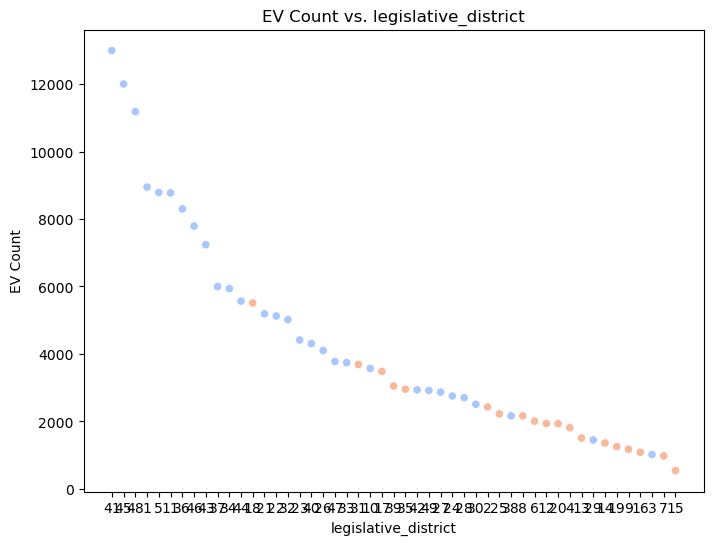

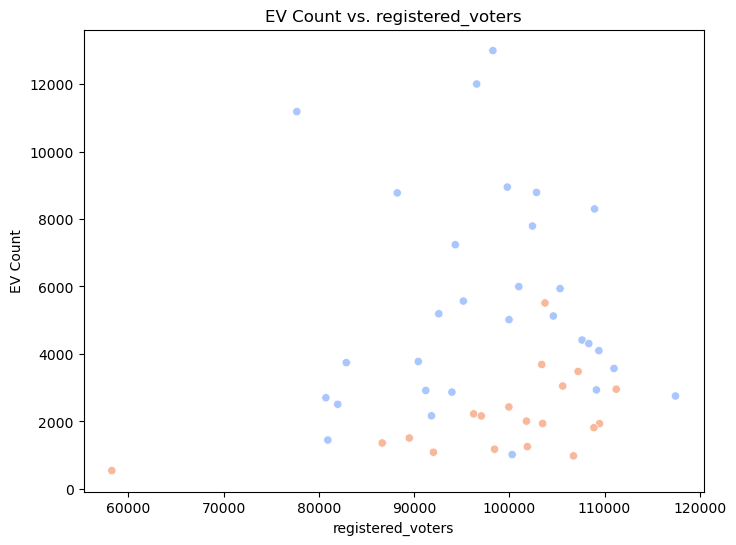

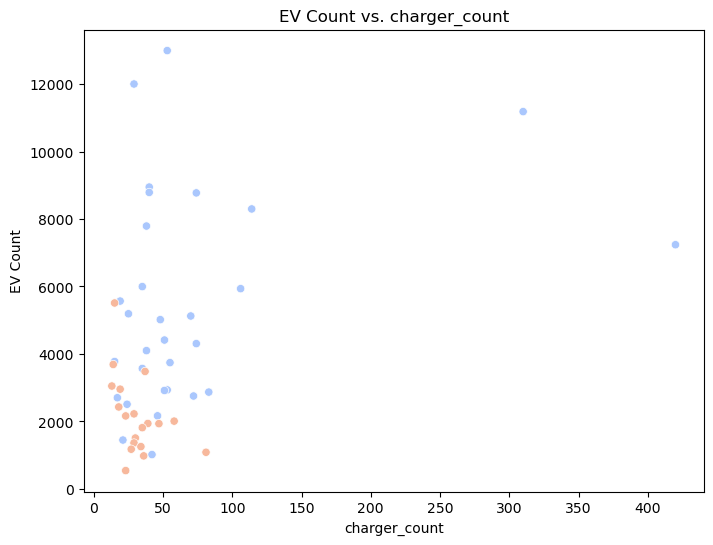

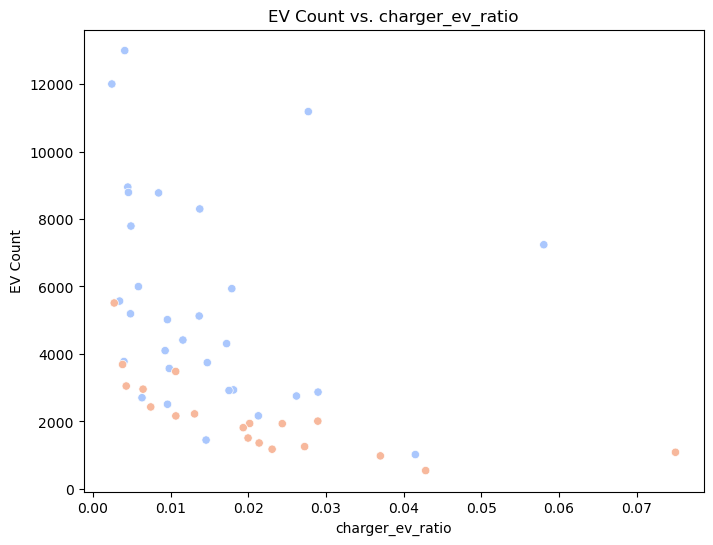

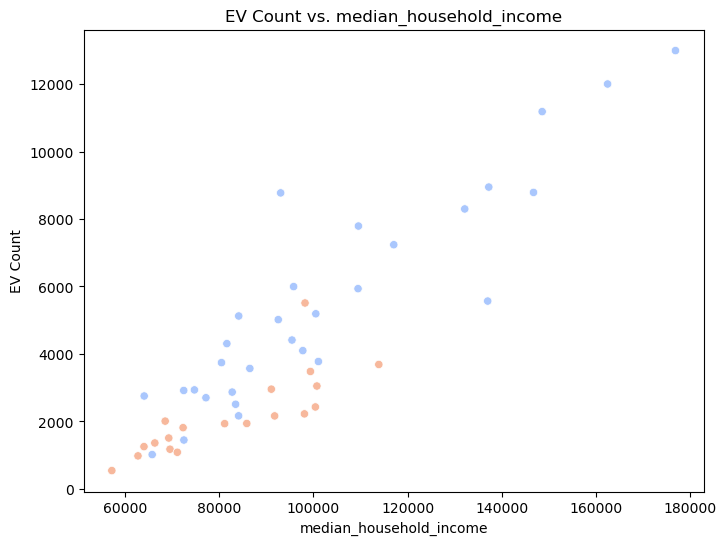

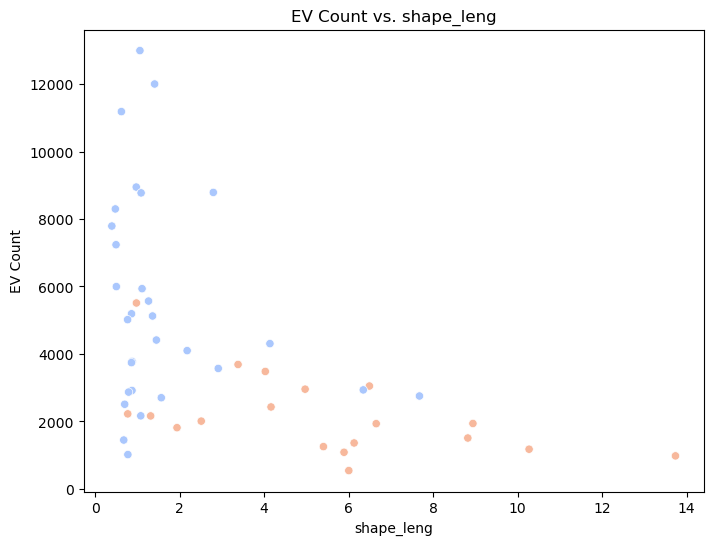

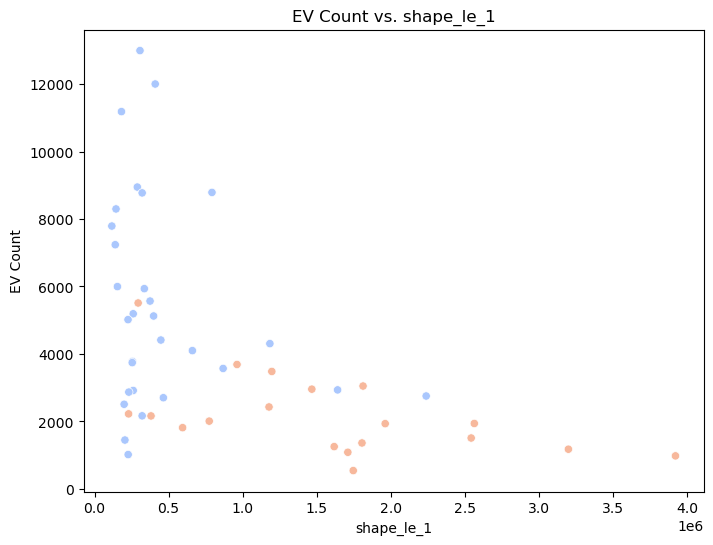

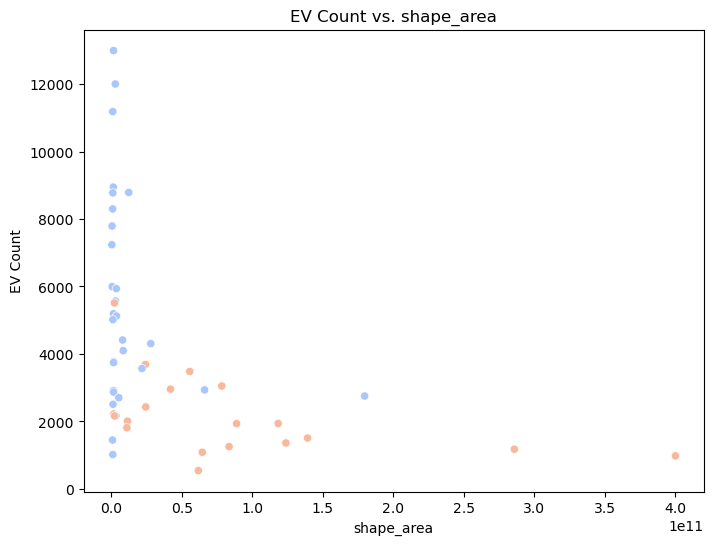

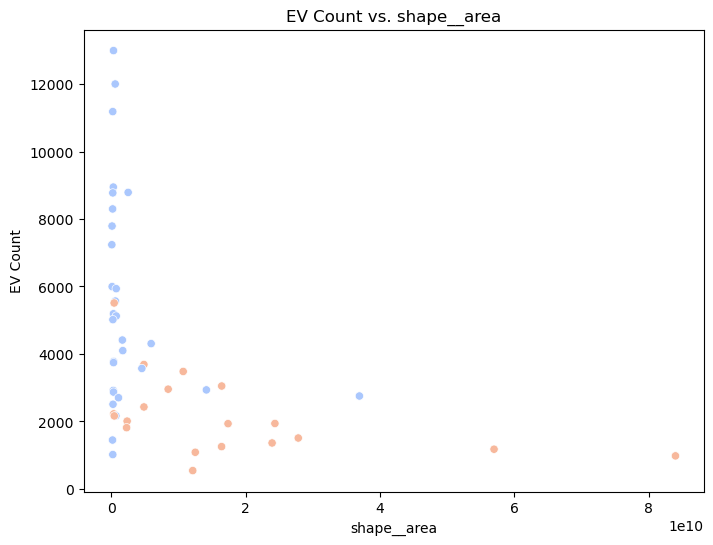

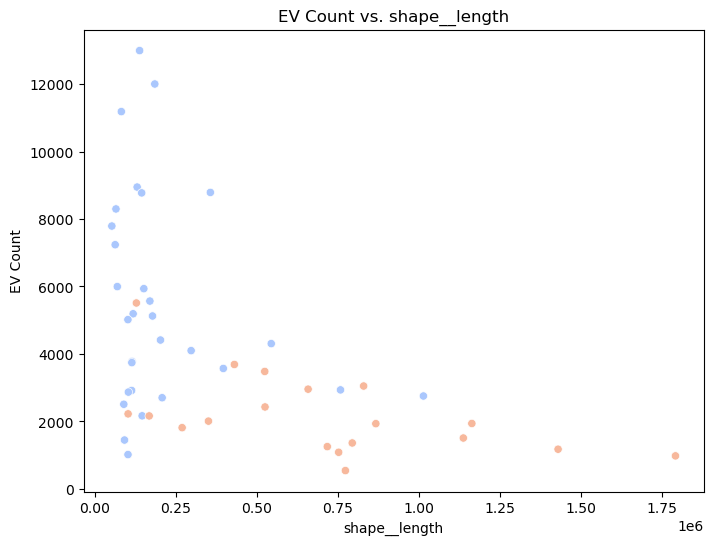

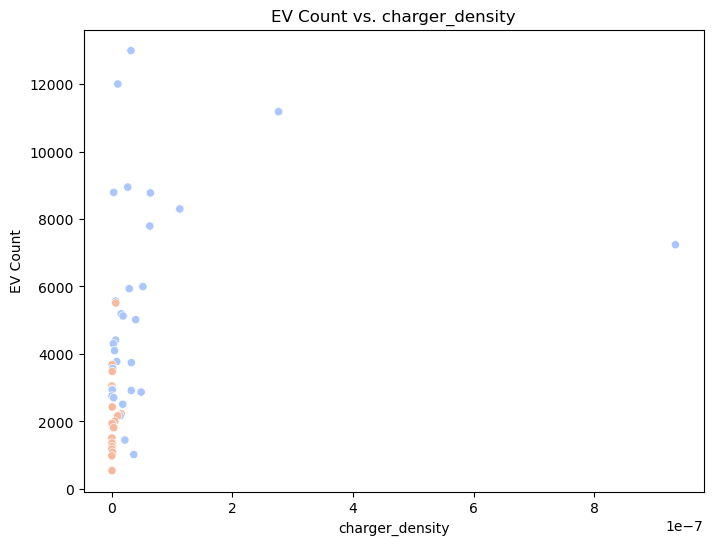

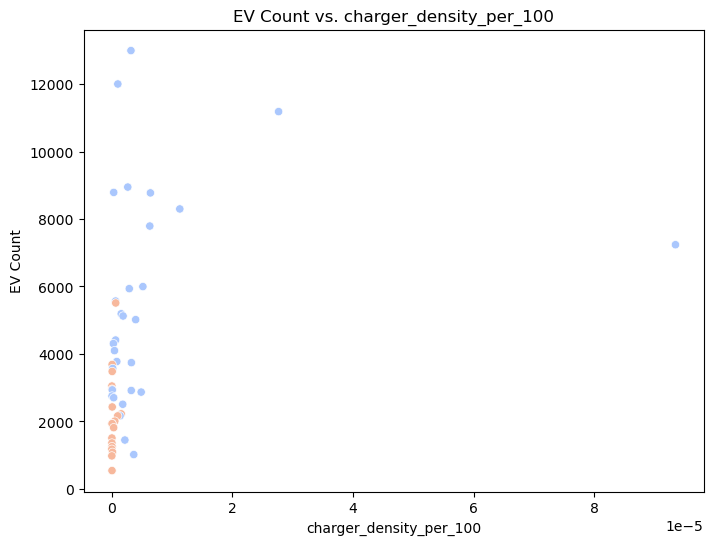

In [236]:
# Check which feature has correlation with EV count

excluded_cols = ['ballots_cast', '%_turnout', 'patty_murray', 'tiffany_smiley', 'geoid', 'margin_error', 'party_won', 'party_won_encoded']
key_cols = [col for col in ev_merged.columns if col not in excluded_cols + ['ev_count']]

# Scatter plot each feature vs. ev count
for col in key_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=ev_merged, x=col, y='ev_count', hue='party_won', palette='coolwarm', legend=False)
    plt.title(f'EV Count vs. {col}')
    plt.xlabel(col)
    plt.ylabel('EV Count')
    plt.show()

- Some features seem to have outliers
    - Especially charing station related cols
- Might try to conduct scaling

# Additional Preprocessing

- encoding
- scaling

In [235]:
# Encoding
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
ev_merged['party_won_encoded'] = encoder.fit_transform(ev_merged['party_won'])

print_cols(ev_merged, 2)

(49, 21)


,legislative_district,ev_count,registered_voters,ballots_cast,%_turnout,patty_murray,tiffany_smiley,party_won,charger_count,charger_ev_ratio,geoid,median_household_income,margin_error,shape_leng,shape_le_1,shape_area,shape__area,shape__length,charger_density,charger_density_per_100,party_won_encoded
0,41,12994,98278,65840,0.6699,45730,19526,Democratic,53,0.0041,61000US53041,176908,4036,1.0598,"306,763.8140","1,667,039,196.5100","340,035,312.1016","138,532.7913",0.0000,0.0000,0
1,45,12003,96577,67381,0.6977,46385,20531,Democratic,29,0.0024,61000US53045,162491,5810,1.4077,"409,524.5479","2,890,039,170.5800","592,170,747.9688","185,351.7548",0.0000,0.0000,0


In [237]:
# Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

temp = ev_merged.copy()

# scaler = RobustScaler()
# scaler = StandardScaler()
# scaler = MinMaxScaler()
# np.log1p # Log
# np.cbrt # Cube Root

# Scaling the relevant columns
# ev_merged['scaled_charger_count'] = scaler.fit_transform(ev_merged[['charger_count']])
# ev_merged['scaled_ev_count'] = scaler.fit_transform(ev_merged[['ev_count']])
# ev_merged['scaled_charger_ev_ratio'] = scaler.fit_transform(ev_merged[['charger_ev_ratio']])
# ev_merged['scaled_charger_density'] = scaler.fit_transform(ev_merged[['charger_density']])

# Create new columns for square root transformation
ev_merged['transformed_ev_count'] = np.sqrt(ev_merged['ev_count'])
ev_merged['transformed_charger_count'] = np.sqrt(ev_merged['charger_count'])
ev_merged['transformed_charger_ev_ratio'] = np.sqrt(ev_merged['charger_ev_ratio'])
ev_merged['transformed_charger_density'] = np.sqrt(ev_merged['charger_density'])

print_cols(ev_merged, 2)

(49, 25)


,legislative_district,ev_count,registered_voters,ballots_cast,%_turnout,patty_murray,tiffany_smiley,party_won,charger_count,charger_ev_ratio,geoid,median_household_income,margin_error,shape_leng,shape_le_1,shape_area,shape__area,shape__length,charger_density,charger_density_per_100,party_won_encoded,transformed_ev_count,transformed_charger_count,transformed_charger_ev_ratio,transformed_charger_density
0,41,12994,98278,65840,0.6699,45730,19526,Democratic,53,0.0041,61000US53041,176908,4036,1.0598,"306,763.8140","1,667,039,196.5100","340,035,312.1016","138,532.7913",0.0000,0.0000,0,113.9912,7.2801,0.0639,0.0002
1,45,12003,96577,67381,0.6977,46385,20531,Democratic,29,0.0024,61000US53045,162491,5810,1.4077,"409,524.5479","2,890,039,170.5800","592,170,747.9688","185,351.7548",0.0000,0.0000,0,109.5582,5.3852,0.0492,0.0001


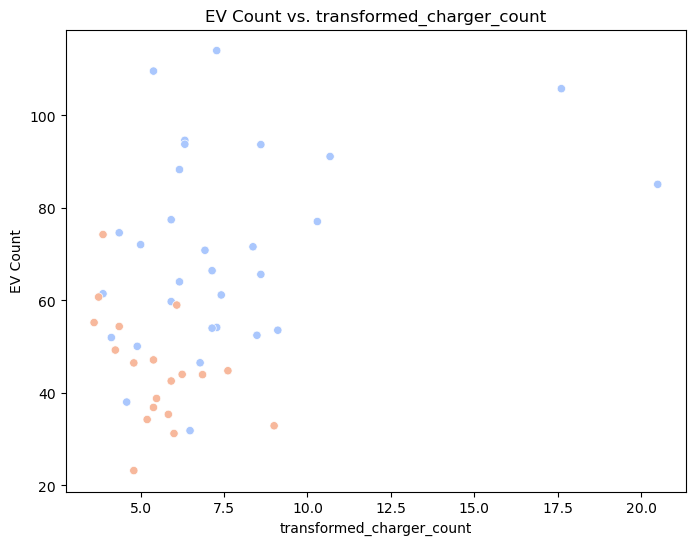

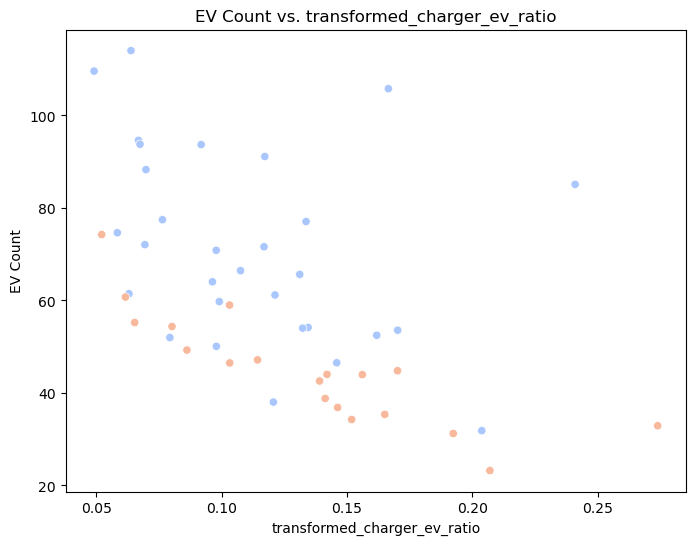

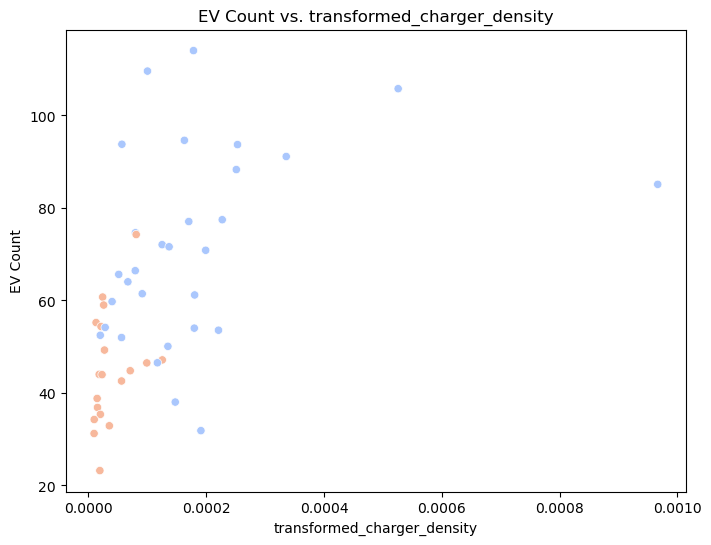

In [246]:
# check

temp_cols = ev_merged.columns[-3:].to_list() + ['transformed_ev_count', 'party_won_encoded']
temp = ev_merged[temp_cols].copy()

temp_cols = ev_merged.columns[-3:].to_list()

# Scatter plot each feature vs. ev count
for col in temp_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=temp, x=col, y='transformed_ev_count', hue='party_won_encoded', palette='coolwarm', legend=False)
    plt.title(f'EV Count vs. {col}')
    plt.xlabel(col)
    plt.ylabel('EV Count')
    plt.show()

In [247]:
import pickle

with open('data/ev_merged.pickle', 'wb') as f:
    pickle.dump(ev_merged, f)

# with open('data/ev_merged.pickle', 'rb') as f:
#     ev_merged = pickle.load(f)

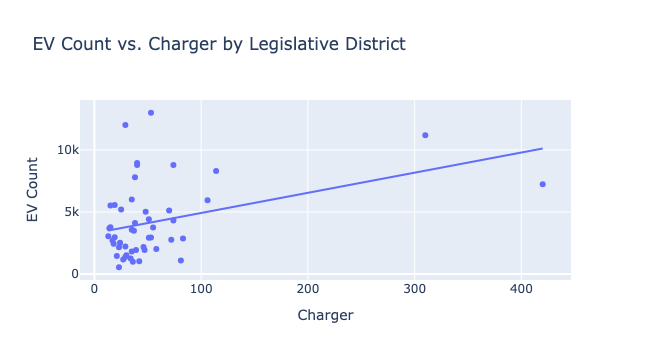

In [248]:
# Plotly

fig_charger= px.scatter(ev_merged
                        , x='charger_count'
                        , y='ev_count'
                        , hover_data=['legislative_district']
                        , title='EV Count vs. Charger by Legislative District'
                        , trendline='ols')
fig_charger.update_xaxes(title='Charger')
fig_charger.update_yaxes(title='EV Count')
fig_charger.show()